In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 1)

folder = './052018_Plate1/'

path_cyt = folder + 'Cytoplasm_May2018_1.xlsx'
path_nuc = folder + 'Nucleus_May2018_1.xlsx'

tabs = ['BT474,Cntrl(rb,c2-4)', 
        'BT474,30nM(rb,c5-7)',
        'BT474,300nM(rb,c8-10)',
        
        'BT474+C3H-scr,Cntrl(rc,c2-4)',
        'BT474+C3H-scr,30nM(rc,c5-7)',
        'BT474+C3H-scr,300nM(rc,c8-10)',
        
        'BT474+C3H-1,Cntrl(rd,c2-4)',
        'BT474+C3H-1,30nM(rd,c5-7)',
        'BT474+C3H-1,300nM(rd,c8-10)',
       
        'BT+AR22,Cntrl(re,c2-4)',
        'BT+AR22,30nM(re,c5-7)',
        'BT+AR22,300nM(re,c8-10)',
        
        'BT+hMSC,Cntrl(rf,c2-4)',
        'BT+hMSC,30nM(rf,c5-7)',
        'BT+hMSC,300nM(rf,c8-10)']

def concat_df(path):
    dt = []
    for t in tabs:
        dt.append(pd.read_excel(open(path, 'rb'), sheet_name=t))
    df = pd.concat(dt, ignore_index=True)
    df['Row'] = df['Well'].apply(lambda x: x[0])
    return df

def plot_grid(df, w, h, title):
    fig, axes = plt.subplots(w, h, figsize=(24, 36))
    cols = df_cyt.columns[4:18]

    for k in range(w * h):
        sns.violinplot(data=df, 
                       x='Row', 
                       y=cols[k], 
                       hue='Group', 
                       dodge=False,
                       ax=axes[(k - 4) // h][(k - 4) % h]).set_title(title)
    plt.show()

def plot_col(df, h, title):
    cols = df.columns[4:18]
    for k in range(h):
        plt.gcf().set_size_inches(8, 8) 
        sns.violinplot(data=df, 
                       x='Row', 
                       y=cols[k], 
                       hue='Group', 
                       dodge=False)
        plt.title(title)  
        plt.show()

In [2]:
df_cyt = concat_df(path_cyt)
print('*** Cytoplasm Dataset:')
df_cyt

*** Cytoplasm Dataset:


,Cell ID,Well,Field,Group,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Ki67 (Cycle 5 - FITC),p-Rb (Cycle 5 - Cy3),FN (Cycle 5 - Cy5),FAP (Cycle 6 - Cy3),SOX2 (Cycle 6 - Cy5),Row
0,11100010031,B02,1,0,518987.3,205953.2,113514.8,115414.1,45224.6,52632.4,31918.5,37747.1,45668.6,19971.8,22993.5,16478.0,34976.7,22686.1,B
1,11100020033,B02,1,0,312344.6,234859.4,108887.6,96656.4,30002.3,30046.4,17766.9,25686.6,22498.5,16724.2,17041.8,12423.0,28935.0,18285.6,B
2,11100030032,B02,1,0,385528.7,143962.8,39818.8,28364.5,20245.2,18019.9,25132.2,19148.2,15581.4,21451.7,16703.0,15742.8,30064.2,21675.8,B
3,11100040029,B02,1,0,304401.9,109639.0,82218.6,61628.7,31035.5,32164.7,19453.0,16561.2,19694.2,24001.3,13031.8,13401.1,24950.5,16400.8,B
4,11100050033,B02,1,0,668529.0,297478.1,97809.4,101615.6,48579.1,73095.8,39959.7,33319.4,69094.3,44884.1,22708.2,48631.7,47353.1,30894.6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303944,59904821031,F10,9,2,620840.6,40577.8,42276.7,22389.8,20913.4,15832.8,12057.1,5326.0,14498.9,22489.2,11989.2,17799.1,53133.3,13064.1,F
303945,59904831032,F10,9,2,646162.1,42222.4,29269.5,17659.9,18419.8,18896.9,13745.8,7355.2,17271.0,22747.3,23024.1,15925.3,21125.6,13884.2,F
303946,59904841033,F10,9,2,690329.7,29714.4,41013.4,25713.0,22299.8,13214.3,13583.7,18234.7,17631.9,18664.3,13746.7,16720.0,17803.4,10993.3,F
303947,59904851034,F10,9,2,803421.6,83582.2,76132.7,39671.9,35083.7,31826.0,20164.5,10932.1,23628.6,29628.7,38979.1,26454.2,29472.5,19947.2,F


In [3]:
# All columns in the Cytoplasm dataset's information
df_cyt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303949 entries, 0 to 303948
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Cell ID                         303949 non-null  int64  
 1   Well                            303949 non-null  object 
 2   Field                           303949 non-null  int64  
 3   Group                           303949 non-null  int64  
 4   Nucleus (Cycle 1 - DAPI)        303949 non-null  float64
 5   BT474-H2BeGFP (Cycle 1 - FITC)  303949 non-null  float64
 6   MCL1 (Cycle 2 - Cy3)            303949 non-null  float64
 7   p-p65NFkB (Cycle 2 - Cy5)       303949 non-null  float64
 8   p-Akt (Cycle 3 - FITC)          303949 non-null  float64
 9   aSMA (Cycle 3 - Cy3)            303949 non-null  float64
 10  p-gH2AX (Cycle 3 - Cy5)         303949 non-null  float64
 11  GRP78 (Cycle 4 - FITC)          303949 non-null  float64
 12  Vimentin (Cycle 

In [4]:
# Check if duplicate ID exists in Cytoplasm dataset
df_cyt['Cell ID'].value_counts()

25905600509    1
38409740815    1
35402040157    1
15100040031    1
37609900900    1
              ..
22910780786    1
29607590619    1
33910320775    1
46102410991    1
24207400553    1
Name: Cell ID, Length: 303949, dtype: int64

In [5]:
# Cytoplasm markers' statistics
df_cyt[df_cyt.columns[4:18]].describe()

,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Ki67 (Cycle 5 - FITC),p-Rb (Cycle 5 - Cy3),FN (Cycle 5 - Cy5),FAP (Cycle 6 - Cy3),SOX2 (Cycle 6 - Cy5)
count,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,303949.0,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05
mean,6.4e+05,8.5e+04,1.6e+05,1.2e+05,4.6e+04,4.8e+04,2.5e+04,27724.8,2.9e+04,2.8e+04,2.5e+04,2.4e+04,4.0e+04,2.3e+04
std,5.2e+05,1.3e+05,1.2e+05,1.3e+05,4.0e+04,5.9e+04,2.1e+04,29291.4,2.9e+04,1.7e+04,2.9e+04,2.8e+04,6.2e+04,3.3e+04
min,0.0e+00,7.6e+01,6.8e+00,4.7e+01,0.0e+00,0.0e+00,0.0e+00,0.0,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00
25%,3.4e+05,2.6e+04,7.4e+04,2.6e+04,2.3e+04,2.1e+04,1.7e+04,11149.5,1.8e+04,1.9e+04,1.5e+04,1.6e+04,2.8e+04,1.6e+04
50%,4.9e+05,3.9e+04,1.2e+05,5.9e+04,3.2e+04,3.1e+04,2.1e+04,18256.7,2.3e+04,2.4e+04,2.0e+04,2.0e+04,3.4e+04,1.9e+04
75%,7.5e+05,7.7e+04,2.0e+05,1.7e+05,5.4e+04,5.4e+04,2.9e+04,31707.1,3.3e+04,3.2e+04,2.8e+04,2.6e+04,4.4e+04,2.4e+04
max,2.2e+07,3.7e+06,5.0e+06,3.0e+06,1.3e+06,4.6e+06,1.7e+06,775979.2,2.9e+06,2.8e+06,6.2e+06,8.6e+06,1.0e+07,3.0e+06


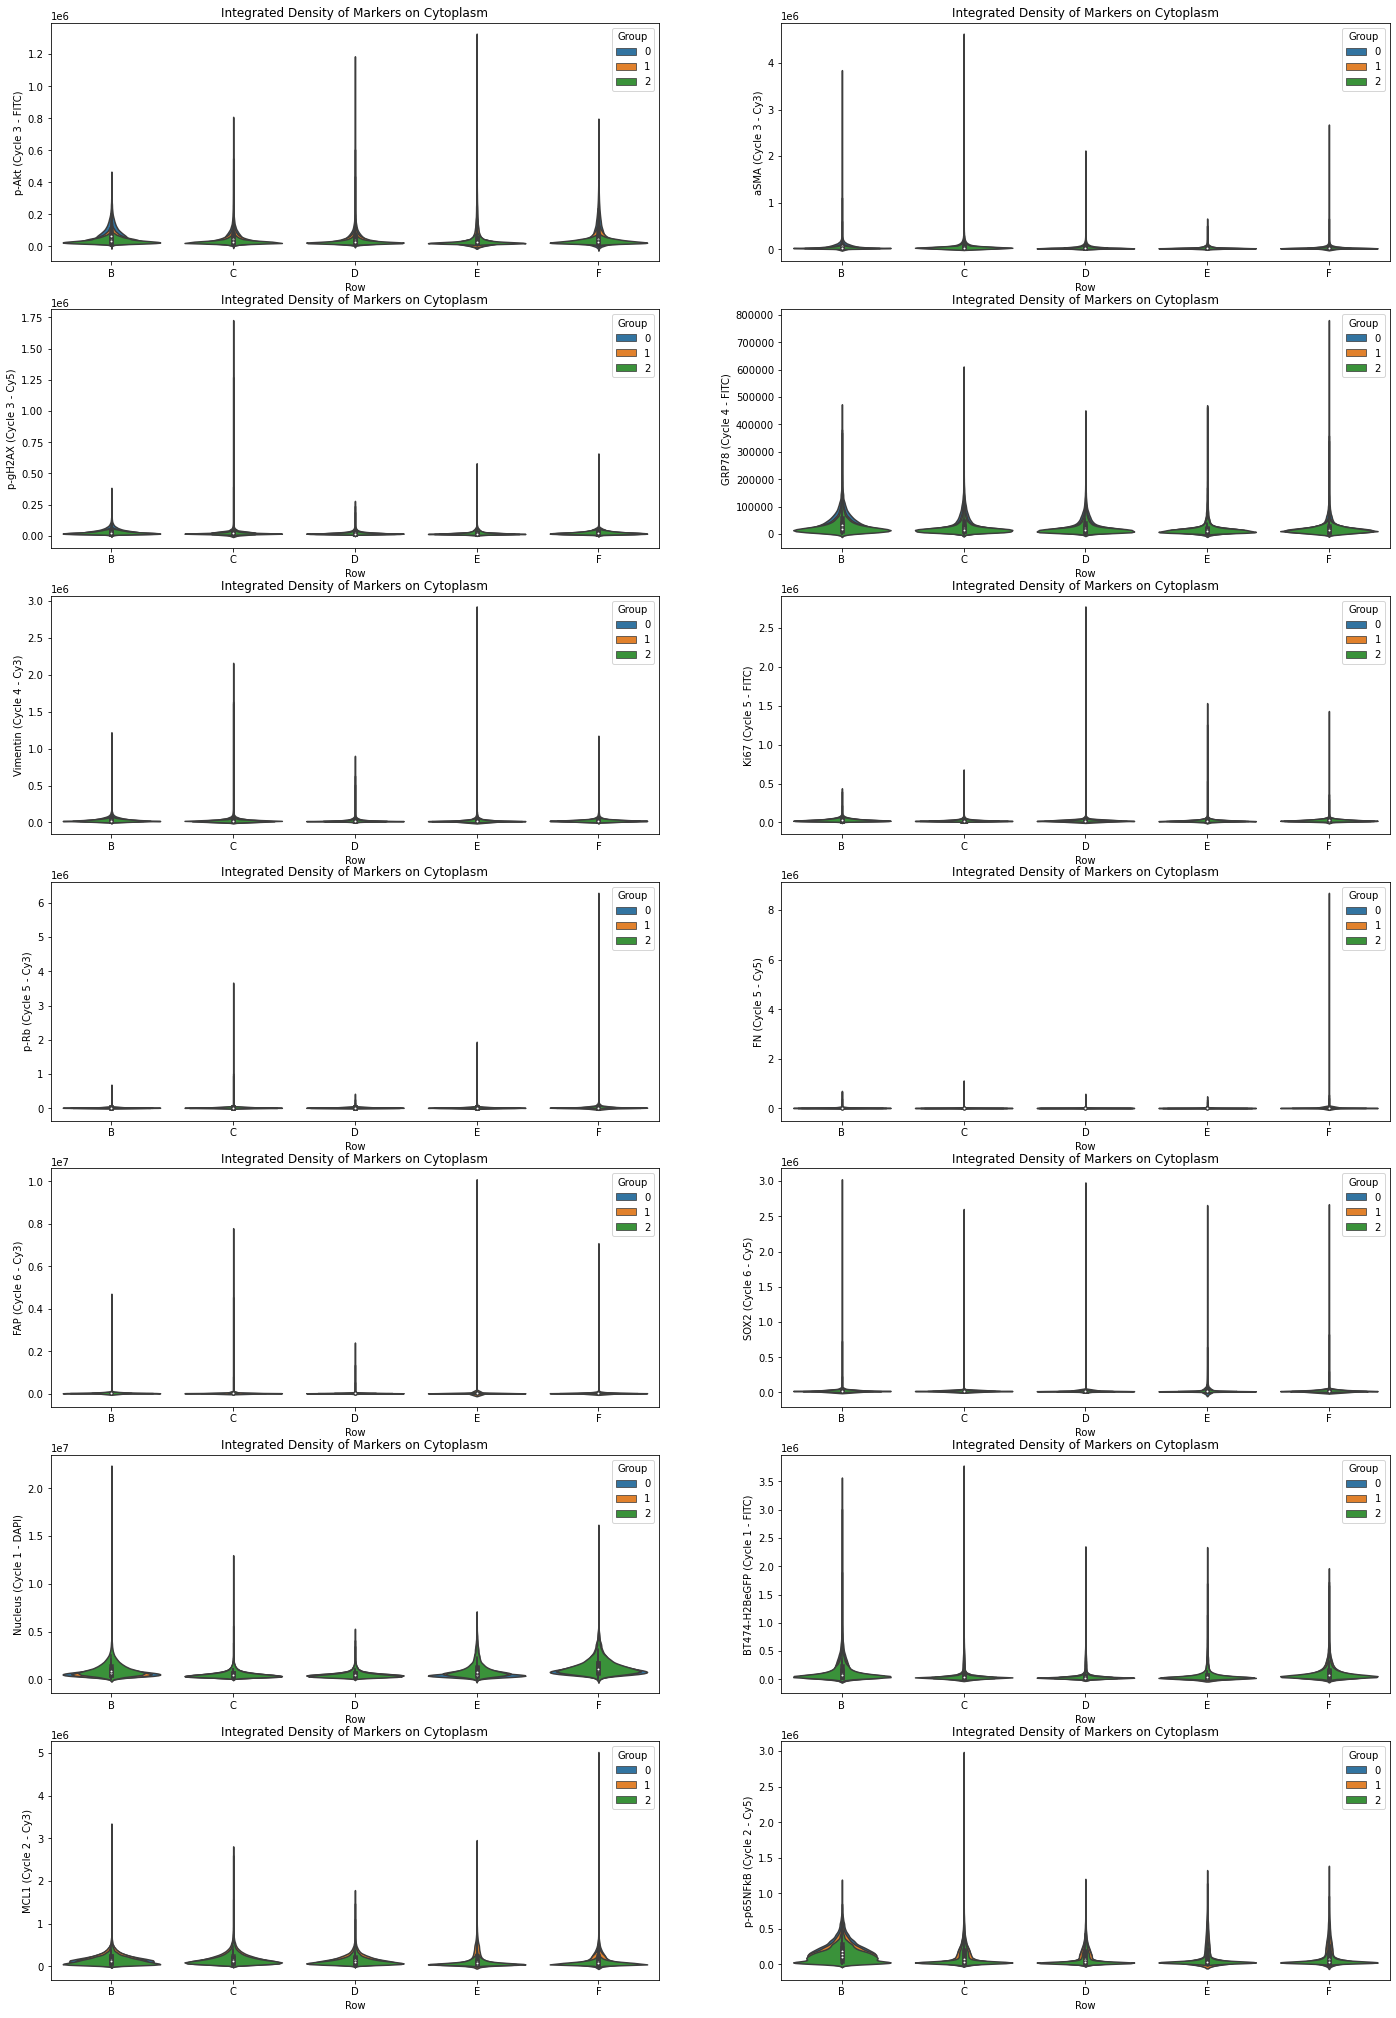

In [6]:
# Plot a grid of plots for Cytoplasm dataset
title = 'Integrated Density of Markers on Cytoplasm'
plot_grid(df_cyt, 7, 2, title)

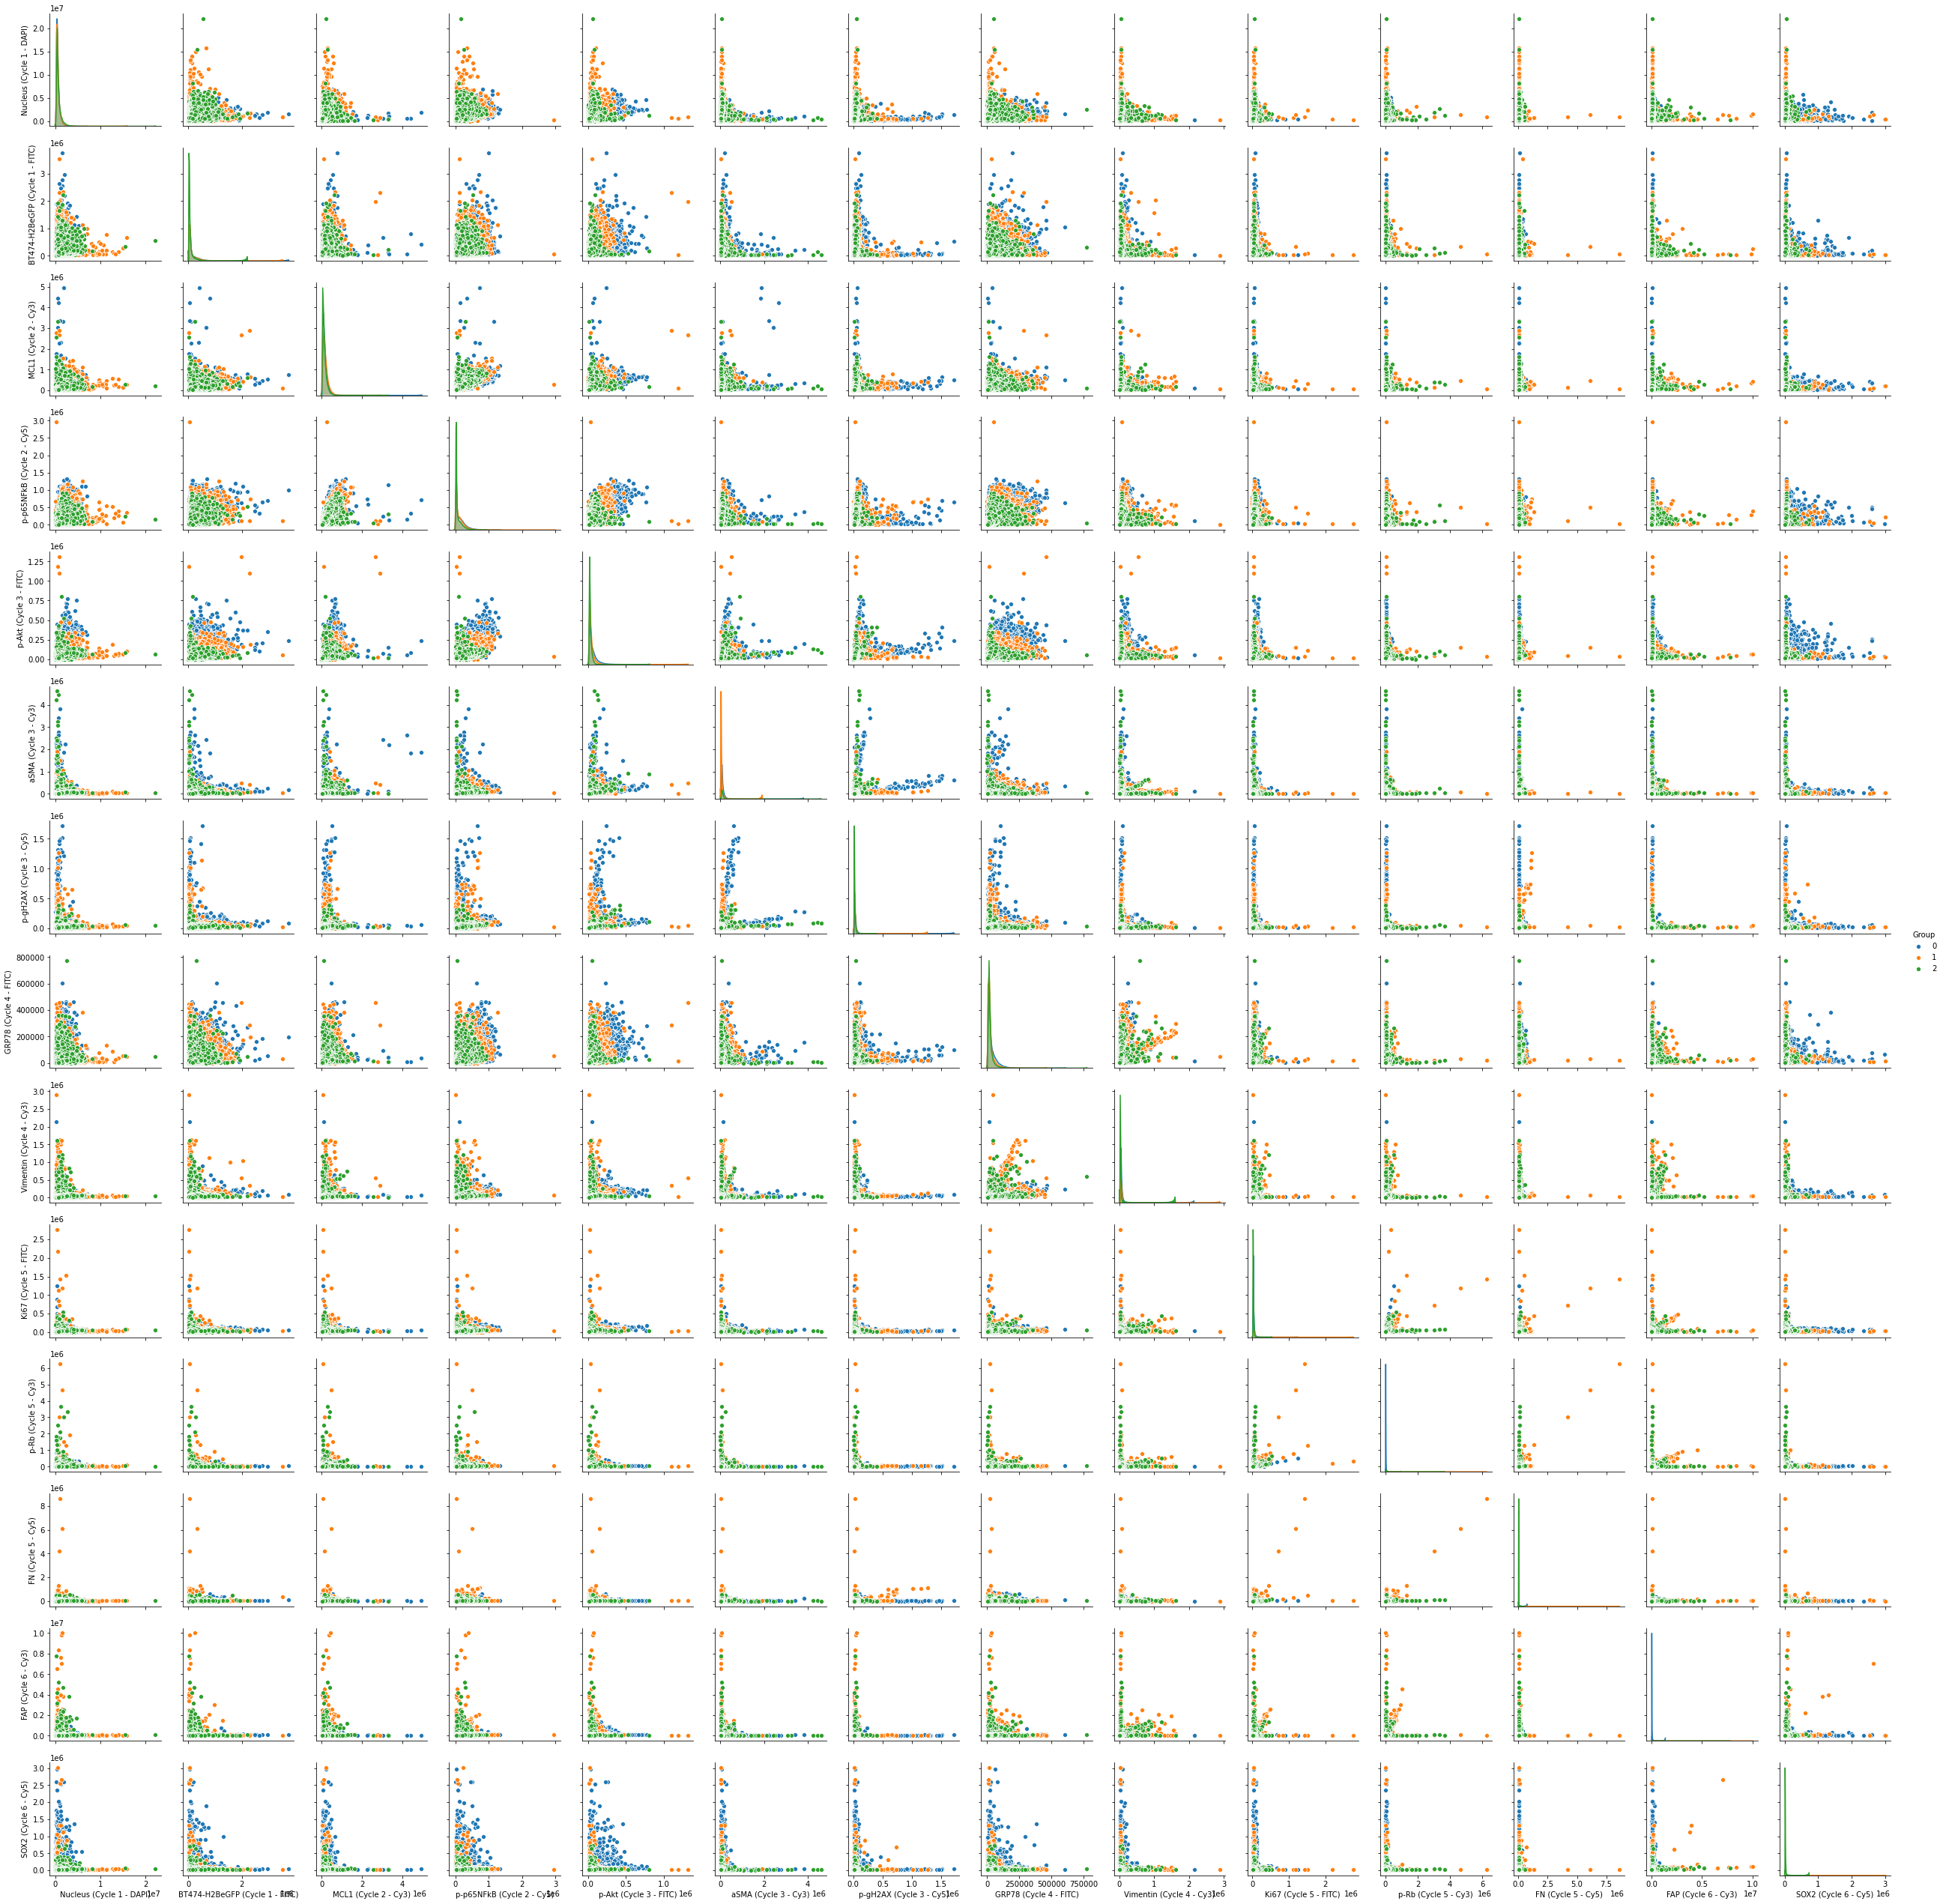

In [7]:
sns.pairplot(df_cyt, vars=df_cyt.columns[4:18], hue='Group');

In [8]:
df_nuc = concat_df(path_nuc)
print('*** Nucleus Dataset:')
df_nuc

*** Nucleus Dataset:


,Cell ID,Well,Field,Group,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Ki67 (Cycle 5 - FITC),p-Rb (Cycle 5 - Cy3),FN (Cycle 5 - Cy5),FAP (Cycle 6 - Cy3),SOX2 (Cycle 6 - Cy5),Row
0,11100010031,B02,1,0,4.5e+05,479770.4,117364.3,130398.7,47960.1,51380.1,41164.5,43428.9,44790.7,23626.0,24980.2,17485.8,41727.4,22574.9,B
1,11100020033,B02,1,0,2.5e+05,323748.0,54751.6,58098.4,21297.1,21781.9,13147.3,21490.7,11034.0,12905.3,12062.2,9643.3,20552.5,12177.7,B
2,11100030032,B02,1,0,4.7e+05,89109.4,31015.2,23827.2,16804.1,14180.5,31386.2,16546.8,14814.8,21276.8,15769.1,15899.8,31961.0,20094.1,B
3,11100040029,B02,1,0,1.7e+05,41204.4,64701.4,45071.7,22226.0,24827.4,14498.9,7530.9,11905.1,15007.5,8827.4,9167.0,16228.4,11185.2,B
4,11100050033,B02,1,0,1.1e+06,364835.2,149139.4,137749.6,78773.2,95053.4,52024.5,57415.8,95224.9,55473.2,31069.5,76342.5,67428.5,37786.2,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303944,59904821031,F10,9,2,8.1e+05,50103.1,37829.5,15427.8,16051.8,9849.6,7616.7,1973.2,8383.3,12210.8,7414.6,8779.0,24399.5,9569.4,F
303945,59904831032,F10,9,2,1.0e+06,66870.6,43350.8,21540.0,25757.1,22174.2,11558.7,7562.3,17298.2,18718.6,19511.6,15303.0,21428.7,12835.7,F
303946,59904841033,F10,9,2,9.1e+05,32761.6,40513.3,27977.3,23047.8,13418.1,15131.5,19307.8,19607.6,20809.8,13893.6,16349.0,12774.5,8335.8,F
303947,59904851034,F10,9,2,1.7e+06,147631.5,108889.3,49825.5,49562.3,55559.8,27754.0,15066.9,33474.8,42652.8,45272.1,31963.5,45391.8,32175.8,F


In [9]:
# All columns in the Nucleus dataset's information
df_nuc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303949 entries, 0 to 303948
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Cell ID                         303949 non-null  int64  
 1   Well                            303949 non-null  object 
 2   Field                           303949 non-null  int64  
 3   Group                           303949 non-null  int64  
 4   Nucleus (Cycle 1 - DAPI)        303949 non-null  float64
 5   BT474-H2BeGFP (Cycle 1 - FITC)  303949 non-null  float64
 6   MCL1 (Cycle 2 - Cy3)            303949 non-null  float64
 7   p-p65NFkB (Cycle 2 - Cy5)       303949 non-null  float64
 8   p-Akt (Cycle 3 - FITC)          303949 non-null  float64
 9   aSMA (Cycle 3 - Cy3)            303949 non-null  float64
 10  p-gH2AX (Cycle 3 - Cy5)         303949 non-null  float64
 11  GRP78 (Cycle 4 - FITC)          303949 non-null  float64
 12  Vimentin (Cycle 

In [10]:
# Check if duplicate ID exists in Nucleus dataset
df_nuc['Cell ID'].value_counts()

25905600509    1
38409740815    1
35402040157    1
15100040031    1
37609900900    1
              ..
22910780786    1
29607590619    1
33910320775    1
46102410991    1
24207400553    1
Name: Cell ID, Length: 303949, dtype: int64

In [11]:
# Nucleus Markers' statistics
df_nuc[df_nuc.columns[4:18]].describe()

,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Ki67 (Cycle 5 - FITC),p-Rb (Cycle 5 - Cy3),FN (Cycle 5 - Cy5),FAP (Cycle 6 - Cy3),SOX2 (Cycle 6 - Cy5)
count,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05
mean,1.2e+06,1.7e+05,1.6e+05,1.5e+05,6.0e+04,5.6e+04,3.2e+04,6.3e+04,4.7e+04,3.1e+04,2.6e+04,2.8e+04,4.4e+04,2.4e+04
std,1.8e+06,4.2e+05,2.6e+05,2.9e+05,9.3e+04,9.2e+04,4.3e+04,1.2e+05,7.6e+04,3.2e+04,4.4e+04,5.4e+04,1.0e+05,4.5e+04
min,0.0e+00,3.5e+03,5.0e+03,1.8e+03,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00
25%,3.5e+05,1.9e+04,3.9e+04,1.9e+04,1.7e+04,1.7e+04,1.3e+04,9.3e+03,1.3e+04,1.4e+04,1.1e+04,1.2e+04,2.0e+04,1.1e+04
50%,6.4e+05,3.4e+04,7.9e+04,5.0e+04,3.0e+04,2.9e+04,2.0e+04,1.9e+04,2.1e+04,2.2e+04,1.8e+04,1.8e+04,3.0e+04,1.7e+04
75%,1.2e+06,9.8e+04,1.7e+05,1.5e+05,6.2e+04,5.9e+04,3.4e+04,5.2e+04,4.5e+04,3.6e+04,3.0e+04,2.9e+04,4.8e+04,2.7e+04
max,4.0e+07,1.6e+07,1.2e+07,8.4e+06,4.0e+06,9.7e+06,4.6e+06,4.4e+06,3.7e+06,2.7e+06,1.2e+07,1.5e+07,2.7e+07,6.7e+06


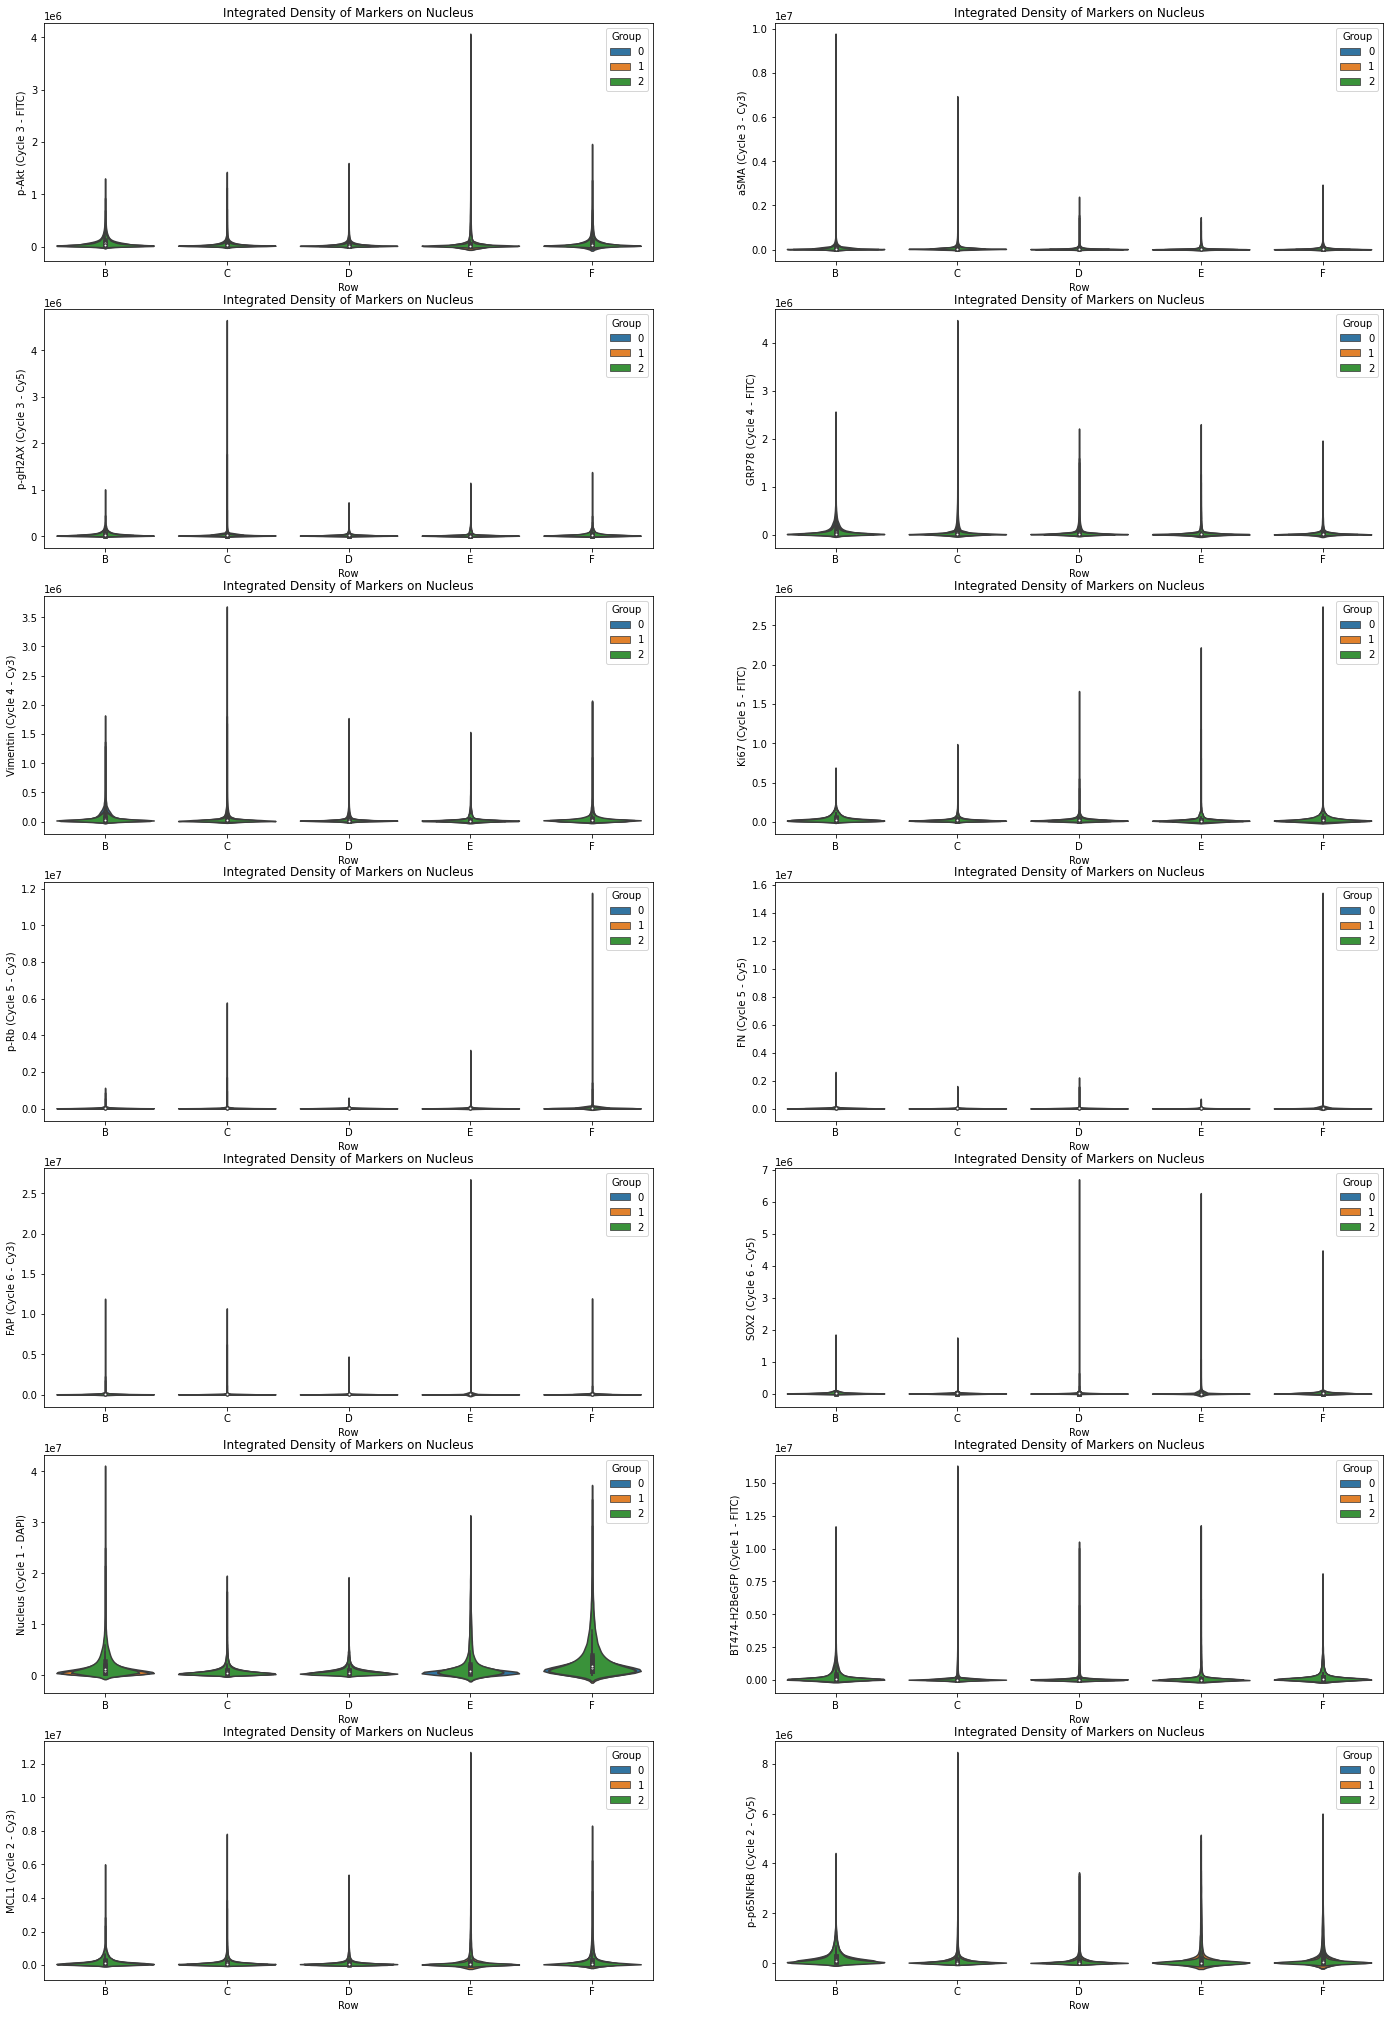

In [12]:
title = 'Integrated Density of Markers on Nucleus'
plot_grid(df_nuc, 7, 2, title)

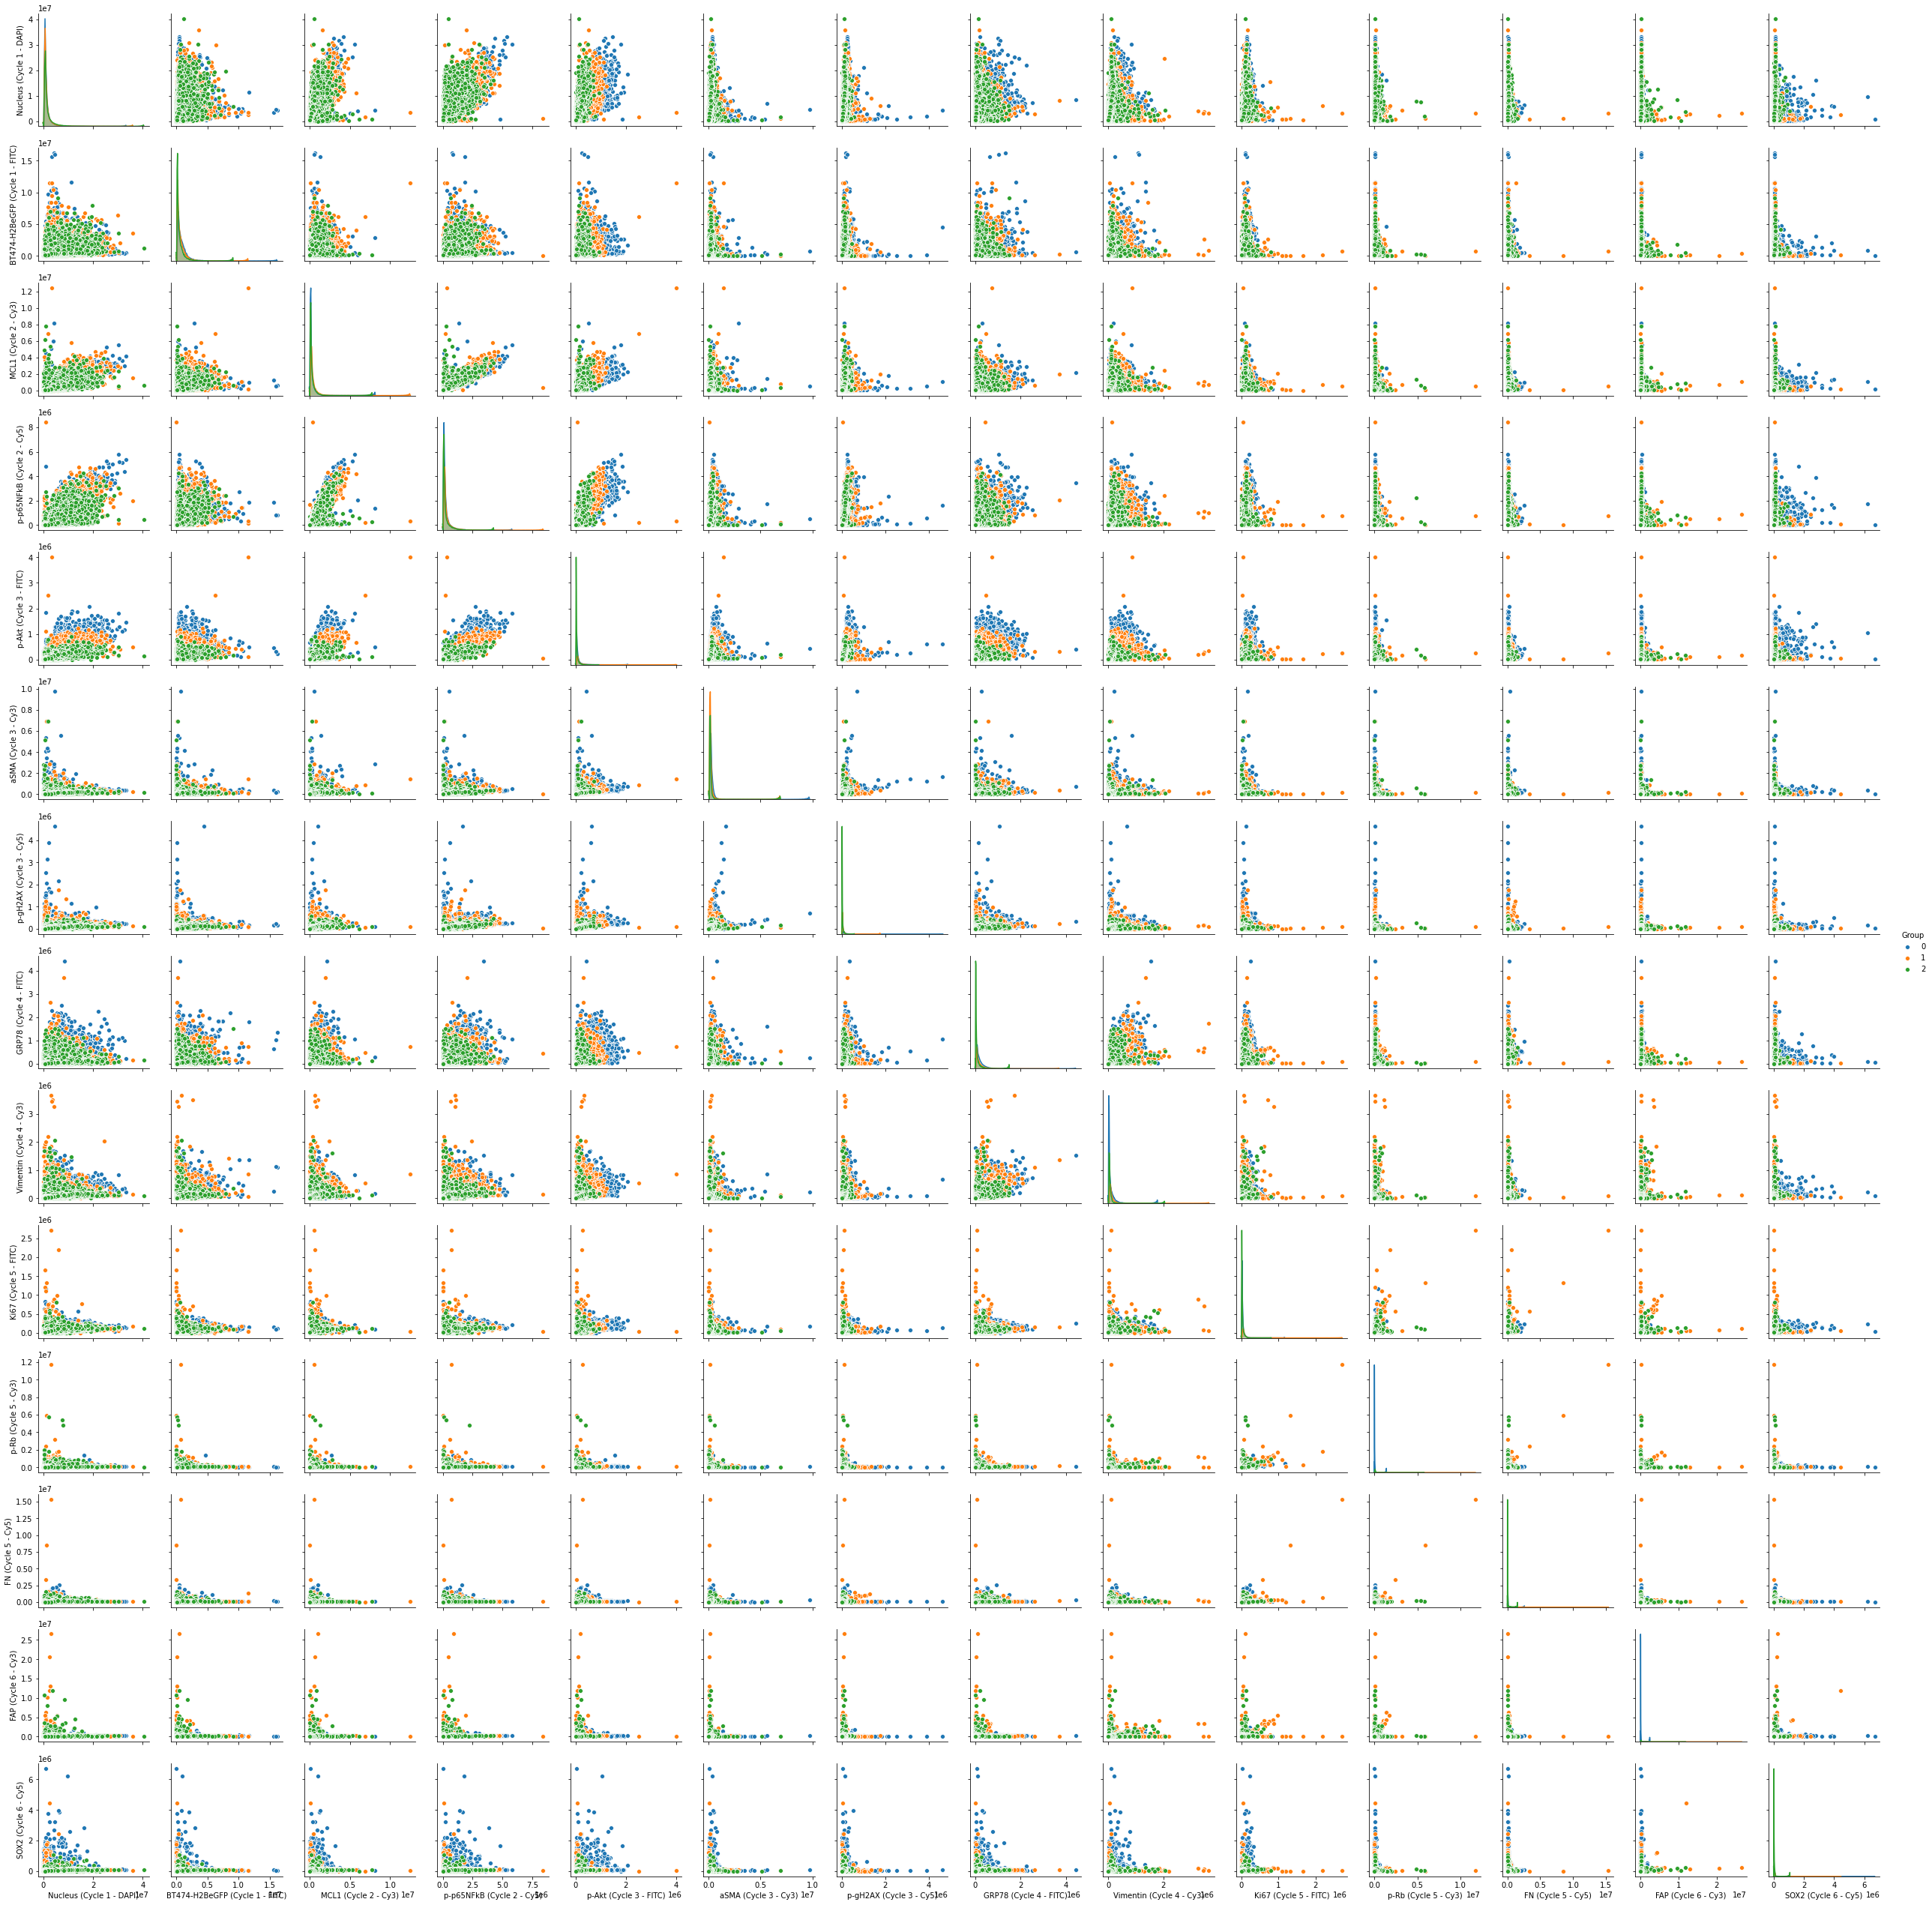

In [13]:
sns.pairplot(df_nuc, vars=df_nuc.columns[4:18], hue='Group');